In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [128]:
splitx = 'split1' # Change this to either: split1,split2,split3

In [129]:
df = pd.read_csv('85_'+splitx+'_results.csv') # Change this to the desired court you want (e.g. 85)

[6.17311943e-05 8.87600855e-07 3.70716616e-06 9.73202696e-06
 1.57168477e-03 7.70882759e-01 8.82434344e-07 2.19455517e-06
 2.27466021e-01 4.00264682e-07]


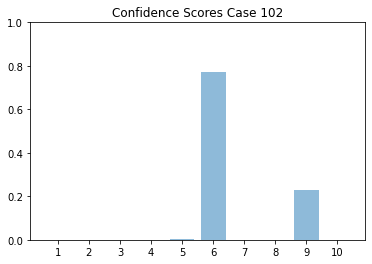

In [136]:
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
performance = df.to_numpy()[102][:10]

print(performance)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylim(0,1)
plt.title('Confidence Scores Case 102')
plt.savefig('a1')
plt.show()
    

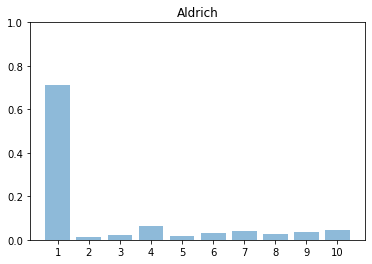

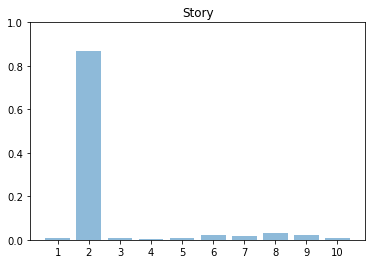

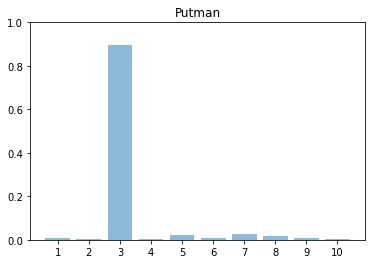

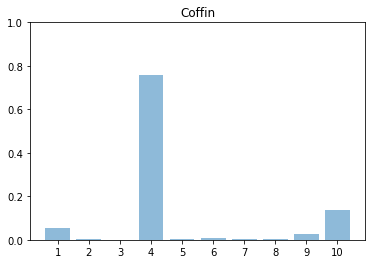

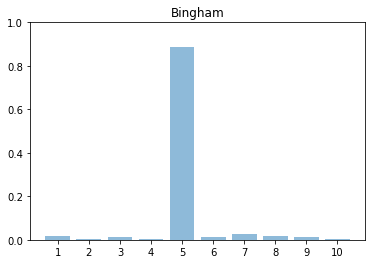

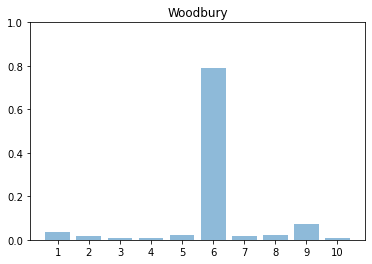

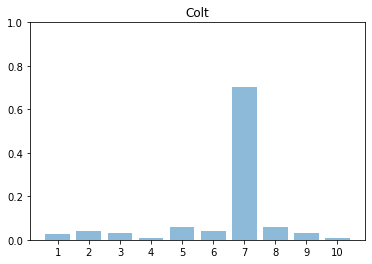

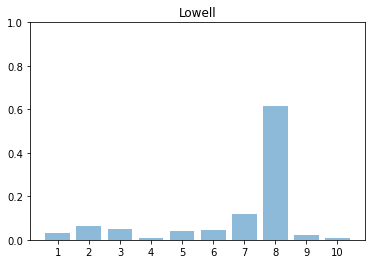

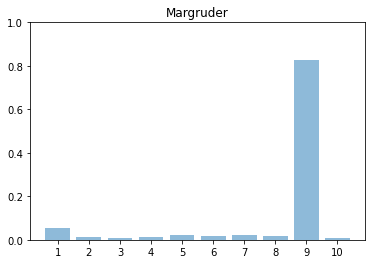

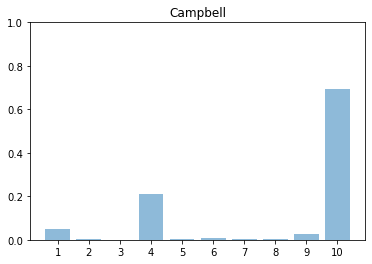

In [137]:
names = ['Aldrich','Story','Putman','Coffin','Bingham','Woodbury','Colt','Lowell','Margruder','Campbell']
probs = [0,0,0,0,0,0,0,0,0,0]
    
for l in range(0,10):
    probs = [0,0,0,0,0,0,0,0,0,0]
    count = 0

    for i,row in df.iterrows():
        if(row['Y'] == l):
            for k in range(0,10):
                probs[k] += row[k]
            count += 1
    
    for k in range(0,10):
        probs[k] = probs[k]/count

    objects = ('1','2','3','4','5','6','7','8','9','10')
    y_pos = np.arange(len(objects))
    performance = probs

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.title(names[l])
    plt.ylim(0,1)
    plt.savefig('meanConfidence'+str((l+1)))
    plt.show()
    

foundone 497
correctAuthor 6.0


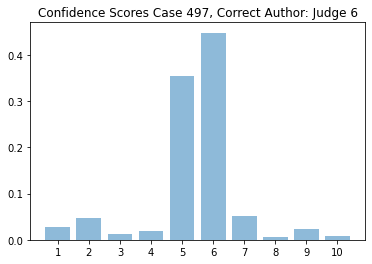

In [120]:
case = 0
correctAuthor = 0
nolist = [189]
values = df.to_numpy()

for i,row in df.iterrows():
    sort = np.sort(row[0:9])

    if (row[10] == 5 and np.max(values[i][:10]) == values[i][5] and i not in nolist):
        probs = [0,0,0,0,0,0,0,0,0,0]
        count = 0
        l = 5

        for i2,row2 in df.iterrows():
            if(row2['Y'] == l):
                for k in range(0,10):
                    probs[k] += row2[k]
                count += 1

        for k in range(0,10):
            probs[k] = probs[k]/count
        
        performance = values[i][:10]
        for k in range(0,10):
            performance[k] = max(0,performance[k]-probs[k])
        
        tmp = np.zeros(10)

        for cc in range(0,10):
            if(cc != 5):
                tmp[cc] = performance[cc]
        

        sort2 = np.sort(np.array(tmp))

        if (sort2[9]>0.2):
            print('foundone', i)
            case = i
            correctAuthor = row[10]+1
            print('correctAuthor', correctAuthor)
            break


objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))

performance = df.to_numpy()[case][:10]                     

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Confidence Scores Case ' + str(case) + ', Correct Author: Judge ' + str(int(correctAuthor)))
plt.savefig('caseStudy1-uninfluenced')
plt.show()

#df.iloc[[case]]

497    6
Name: Y, dtype: int64


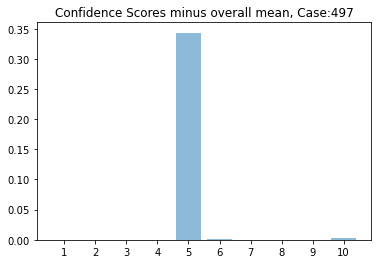

In [121]:
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
values = df.to_numpy()
print(df.iloc[[case]]['Y']+1)
performance = values[case][:10]                     

count = 0
l = correctAuthor-1

for i2,row2 in df.iterrows():
    if(row2['Y'] == l):
        for k in range(0,10):
            probs[k] += row2[k]
        count += 1

for k in range(0,10):
    probs[k] = probs[k]/count


for i in range(0,10):
    performance[i] = max(0,performance[i]-probs[i])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Confidence Scores minus overall mean, Case:'+ str(case))
plt.savefig('exampleDistribution2')
plt.show()